# Introduction to Regression

Now that you have gone throught the preliminary training provided on certain topics of AI, let us deep dive into some hand on tasks. In this notebook we will walk you step by step through the process of creating a Regressor.

## What is Linear Regression?

Linear Regression is one of the most common and basic types of machine learning models used for predictive analysis. The main idea of regression is to examine two things:


*   Does a given set of predictor variables do a good job in predicting the outcome (dependent) variable?
*   Which variables in particular are significant predictor of the outcome variables, and in what way do they impact the outcome variable?

In linear regression the variable you are trying to predict is explained using the relation between this variable and one or more independent variables. For example if you are trying to predict the house prices (dependent/outcome variable) this could be determined by independent variables such as location, size, amenities etc (independent/predictor variables). 



### Image worth a thousand words

In the image below, you can see a visualization of how a linear regression would fit a given dataset. Each blue point on the graph is a data point, where the value on the x-axis is used to predict its corresponding value on the y-axis. As show in the graph again, the red line is the model that would fit the data the most appropriately. Although the line does not pass through every single data point, it provides a suitable model to predict the y-values of unknown new datapoints. 

For example considering the grph below, if we are given x=2, according to linear regression (red line) the corresponsing y-value we would predict would be y=2. 

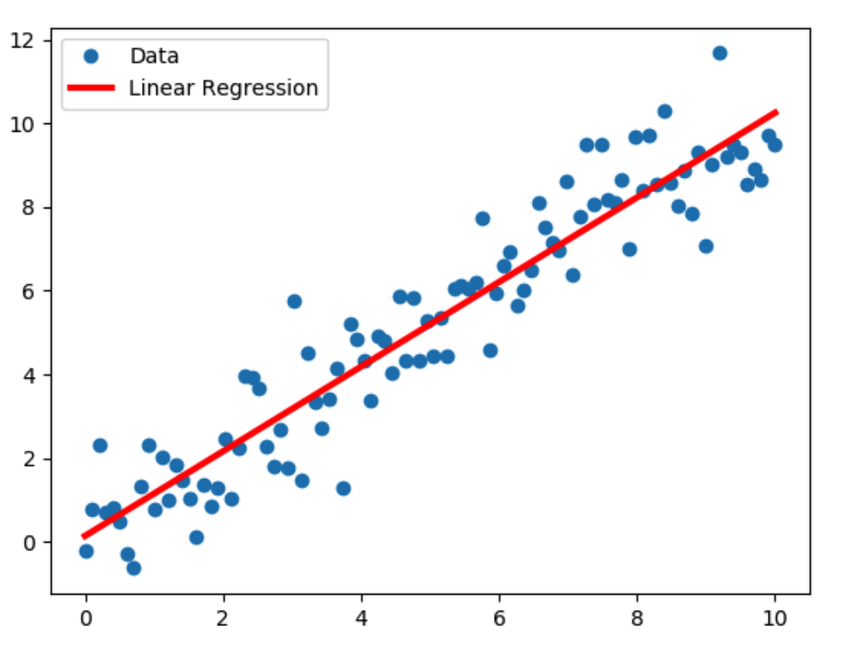

# Creating a Regression Model

## Dataset
The dataset we will be using is the diabetes dataset from the sklearn library. This dataset contains many features which can be used to predict whether a person has diabetes or not. For the sake of simplicity, intead of taking all the feature we will simply take 1 feature and see if we can use that as the predictor variable for diabetes.

Let us have a look at some chracteristics of the dataset and try to understand it. 

In [ ]:
# Imports, you can simply execute this cell
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()
df = pd.DataFrame(data = diabetes.data, columns = diabetes.feature_names)

In [ ]:
# Check how many entries are in the dataset
df.shape[0]

442

In [ ]:
# Check how many columns (features) the dataset contains
df.shape[1]

10

In [ ]:
# Print the first 5 values in the dataset
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [ ]:
# Print 10 random data points
df.sample(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
49,-0.041840,0.050680,0.014272,-0.005671,-0.012577,0.006202,-0.072854,0.071210,0.035462,-0.013504
429,-0.041840,-0.044642,-0.033151,-0.022885,0.046589,0.041587,0.056003,-0.024733,-0.025952,-0.038357
365,0.034443,-0.044642,-0.038540,-0.012556,0.009439,0.005262,-0.006584,-0.002592,0.031193,0.098333
56,-0.041840,-0.044642,0.041218,-0.026328,-0.031840,-0.030437,-0.036038,0.002943,0.033657,-0.017646
271,0.038076,0.050680,0.008883,0.042530,-0.042848,-0.021042,-0.039719,-0.002592,-0.018118,0.007207
149,-0.049105,0.050680,-0.005128,-0.046985,-0.020832,-0.020416,-0.069172,0.071210,0.061238,-0.038357
22,-0.085430,-0.044642,-0.004050,-0.009113,-0.002945,0.007767,0.022869,-0.039493,-0.061177,-0.013504
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504
394,0.034443,-0.044642,0.018584,0.056301,0.012191,-0.054549,-0.069172,0.071210,0.130081,0.007207
288,0.070769,0.050680,-0.016984,0.021872,0.043837,0.056305,0.037595,-0.002592,-0.070209,-0.017646


In [ ]:
# Pull out the characteristics of each column attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


## Regression in Python

Now let us import the necessary libraries and create our own regression model! We will be looking at a diabeties dataset built into the scikit learn library. 

One important thing we have to do when working with labelled data, is to divide it into a training and testing set. The training set is used to train the model, and the tesitng set is to test whether the train model can perform well and produce adequate results on unseen data. 

If you do not know any functions, please refer to the scikit learn library documentation online and you should find a lot of guidance and help.

**Please write your code where indicated by the comments!**

In [ ]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [ ]:
# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

In [ ]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

In [ ]:
# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [ ]:
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [ ]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

## Evaluating the model

So with the above code, you have hopefully created the linear regression model, and produced predictions for your test data. Now it is time to check whether the predictions were accurate, and how far they actually were from the true values of the data points. 

In order to properly evalaute the model, we need some sort of metric. This metric has to measure how well our model seemed to perform on unseen data. The state of the art metric used for measuring the performance of linear regressors is mean squared error (MSE). A visualization of this can be seen below. The equation of MSE inherently checks the absolute value of the distance between the real and predicted values, squares them ad takes the mean. 

The smaller the MSE, the better our linear regressor predicts the unseen data. 

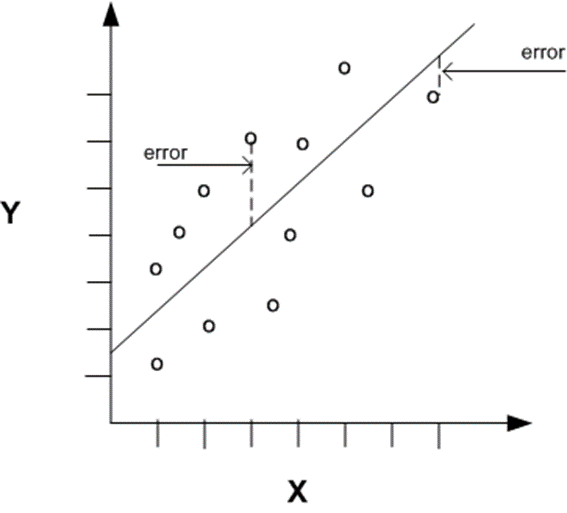



In [ ]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))

Mean squared error: 2548.07


In [ ]:
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficient of determination: 0.47


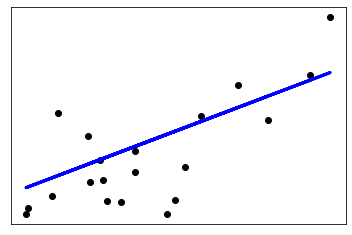

In [ ]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# Real World Applications


* Businesses often use regression modelling techniques in order to determine the relationship between their different advertising techniques and the revenue.
* Medical applications can often include attempting to predict the blood pressure of the patient based on the drug dosage given to them.
* Regression can also be used for forecasting where for example historical financial data is fed into the model, which is used to predict (forecast) future trends. 



# Do it yourself!

Congratulations! Now you know what regression is and how to apply it in Python. You can try it out on a new data set using the methods you've learned!

In [ ]:
wine = datasets.load_wine()
wine_df = pd.DataFrame(data = wine.data, columns = wine.feature_names)